In [1]:
import pymc3 as pm
import theano.tensor as tt
import numpy as np
import scipy.stats as stats

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

In [18]:
p = 0.7
data = stats.bernoulli.rvs(p, size=100)
print(data)

print(data.sum())
print(data.mean())

[1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1]
75
0.75


In [19]:
with pm.Model() as model:
    p = pm.Uniform("p", 0, 1)
    observation = pm.Bernoulli("obs", p, observed=data)
    
    step = pm.Metropolis()
    # TODO: What are these args? (Explained in later chapters)
    trace = pm.sample(10000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 11 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [21]:
print(trace["p"].shape)

(40000,)


In [ ]:
# Experimenting with get_MAP

In [22]:
with pm.Model() as model2:
    p = pm.Uniform("p", 0, 1)
    observation = pm.Bernoulli("obs", p, observed=data)
    
    step = pm.Metropolis()
    start = pm.find_MAP()
    print(start)
    # TODO: What are these args? (Explained in later chapters)
    trace = pm.sample(10000, step=step, return_inferencedata=False, start=start)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [p]



{'p_interval__': array(1.09861229), 'p': array(0.75)}


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 11 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
# Experimenting with plots

/Users/andrew.chang/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/andrew.chang/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


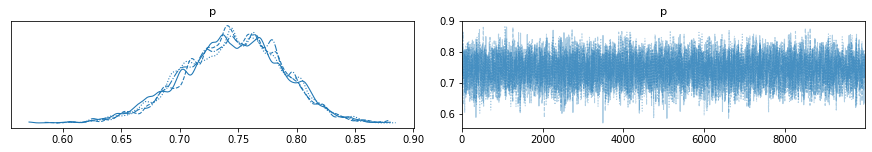

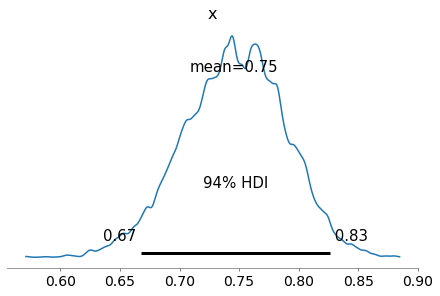

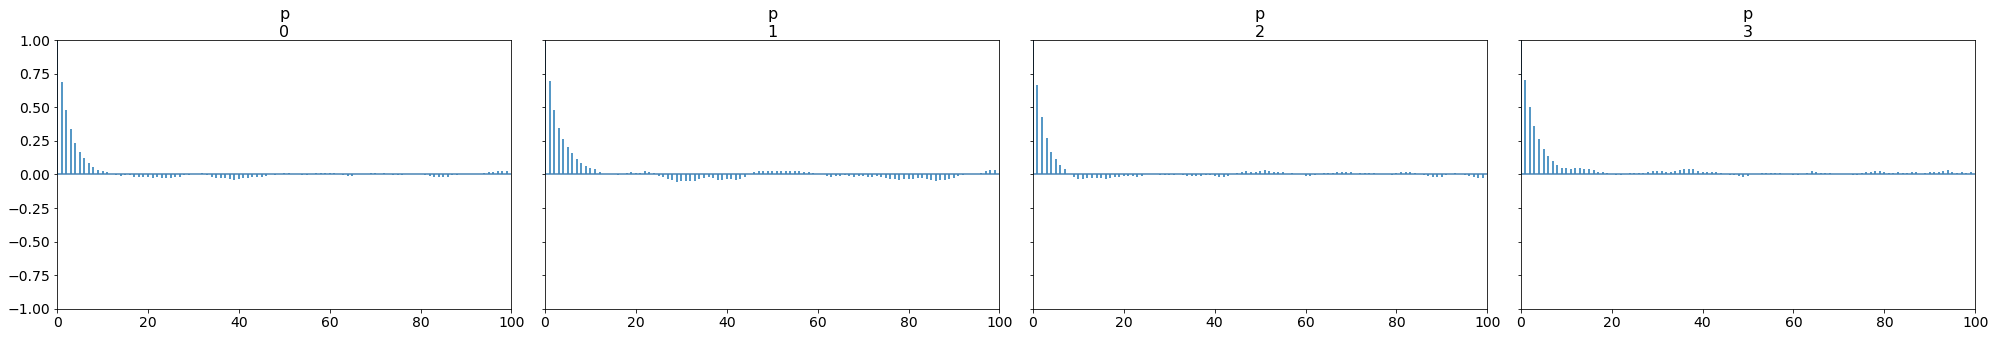

In [23]:
pm.plots.traceplot(trace, var_names=["p"])
pm.plots.plot_posterior(trace["p"])
pm.plots.autocorrplot(trace, var_names=["p"]);